[View in Colaboratory](https://colab.research.google.com/github/juzkev/A-Bridged/blob/master/LM_Classification.ipynb)

# Setup Libs

In [0]:
# Time
import time
start_t = time.time()

# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyPDF2
# !pip install pypdf2
# import PyPDF2

#textract
!apt-get install python-dev libxml2-dev libxslt1-dev antiword unrtf poppler-utils pstotext tesseract-ocr flac ffmpeg lame libmad0 libsox-fmt-mp3 sox libjpeg-dev swig libpulse-dev
!pip install textract
import textract

# DS essentials
import pandas as pd
import numpy as np

# NLP
import re



##### Additional Setup for Google Colab Fast AI & PyTorch #####

## Install Pytorch and torchvision
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.1-cp36-cp36m-linux_x86_64.whl torchvision 
  
# ## Install Fastai (Github version)
!git clone https://github.com/fastai/fastai.git
!pip install -r fastai/requirements.txt
!pip install ./fastai

#Install Fastai (pip)
# !pip install fastai

## Install libSM
### The import of fastai is will throw an error that this library is missing. So, Installing the same.
!apt update && apt install -y libsm6 libxext6


# Install Spacy required for fastai.text
!pip install -U spacy
!python -m spacy download en

print(f'Set up Process took {time.time() - start_t} seconds')

In [3]:
# GPU status
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!nvidia-smi

Sat Jun 16 14:53:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8    31W / 149W |      0MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# Export saved files

In [117]:
# # EXPORT

# filename = 'export1706.tar.gz'

# print('Archiving files')
# !tar --exclude='./data/aclImdb/models/wt103' -cvzf {filename} ./data/aclImdb ./data/imdb_clas ./data/imdb_lm ./data/df.pkl

# !ls -l -h

# # Google Drive
# !pip install -U -q PyDrive
# import os
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# fid = '1oVM1krBOzXbxgDN9hq8UqQjMxrgvLwzB'     # /DS/A-Bridged

# f = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": fid}]})
# f.SetContentFile({filename})
# f.Upload()
# print('Created file %s with mimeType %s' % (f['title'], f['mimeType']))

Archiving files
./data/aclImdb/
./data/aclImdb/models/
./data/aclImdb/models/tmp.h5
./data/aclImdb/models/lm5_enc.h5
./data/aclImdb/models/lm_last_ft.h5
./data/aclImdb/models/lm5.h5
./data/aclImdb/tmp/
./data/imdb_clas/
./data/imdb_clas/classes.txt
./data/imdb_clas/train.csv
./data/imdb_clas/test.csv
./data/imdb_lm/
./data/imdb_lm/tmp/
./data/imdb_lm/tmp/tok_trn.npy
./data/imdb_lm/tmp/val_ids.npy
./data/imdb_lm/tmp/tok_val.npy
./data/imdb_lm/tmp/itos.pkl
./data/imdb_lm/tmp/trn_ids.npy
./data/df.pkl
total 841M
drwxr-xr-x 10 root root 4.0K Jun 16 15:07 data
drwxr-xr-x  1 root root 4.0K Jun 16 14:40 datalab
-rw-r--r--  1 root root 421M Jun 16 16:49 export1506.tar.gz
-rw-r--r--  1 root root 421M Jun 16 16:50 export1706.tar.gz
drwxr-xr-x  8 root root 4.0K Jun 16 14:43 fastai
-rw-r--r--  1 root root  24K Jun 16 16:19 losses.npy
-rw-r--r--  1 root root  12K Jun 16 16:19 loss_plot.png
textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1

# Import saved files

In [1]:
# Google Drive
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import re

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_list = drive.ListFile(
        {'q': f"'1oVM1krBOzXbxgDN9hq8UqQjMxrgvLwzB' in parents"}).GetList()

for f in file_list:
  if re.match(r'export.*\.tar\.gz', f['title']):
    if f['labels']['trashed'] == False:
      f_ = drive.CreateFile({'id': f['id']})
      f_.GetContentFile(f['title'])
      print('Created file %s with mimeType %s' % (f_['title'], f_['mimeType']))
      print('Extracting files')
      !tar -xvzf {f_['title']}
      
      
# Import all the variables


textract 1.6.1 has requirement chardet==2.3.0, but you'll have chardet 3.0.4 which is incompatible.
textract 1.6.1 has requirement six==1.10.0, but you'll have six 1.11.0 which is incompatible.
tensorboard 1.8.0 has requirement bleach==1.5.0, but you'll have bleach 2.1.3 which is incompatible.
tensorboard 1.8.0 has requirement html5lib==0.9999999, but you'll have html5lib 1.0.1 which is incompatible.
plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
Created file export1506.tar.gz with mimeType application/x-tar
Extracting files
./data/aclImdb/
./data/aclImdb/models/
./data/aclImdb/models/tmp.h5
./data/aclImdb/models/lm_last_ft.h5
./data/aclImdb/tmp/
./data/imdb_clas/
./data/imdb_clas/train.csv
./data/imdb_clas/test.csv
./data/imdb_clas/classes.txt
./data/imdb_lm/
./data/imdb_lm/tmp/
./data/imdb_lm/tmp/itos.pkl
./data/imdb_lm/tmp/trn_ids.npy
./data/imdb_lm/tmp/val_ids.npy
./data/imdb_lm/tmp/tok_val.npy
./data/imdb_lm/tmp/tok_trn.npy
Created

# Downloading PDFs from Google Drive

In [6]:
# choose a local (colab) directory to store the data.
start_t = time.time()

local_download_path = os.path.expanduser('~/data')
try:
  os.makedirs(local_download_path)
except: pass

ids = {'SDG 15 - Life on Land': '16O4EAd9uQomSH5CBy8zvZklCUujk8yzn',
      'SDG 12 - Responsible Consumption and Production': '1h1n9hVcrT73a1sh9cuJDBmW0erBRa_ZS',
      'SDG 10 - Reduced Inequalities': '1SLumvZ4n4BJM3zmXdIUWEplcjx2JGMN-',
      'SDG 08 - Decent Work and Economic Growth': '1jIm9xN6PiGvnGQ9Xu0OSUZHsexuTTTaC',
      'SDG 05 - Gender Equality': '116grOjLbS7j79UPvNEz0jEb3WR-4BVMX'}

def download_files(ids):
  for name, id in ids.items():
    try:
      os.makedirs(os.path.join(local_download_path, name))
    except: pass
    file_list = drive.ListFile(
        {'q': f"'{id}' in parents"}).GetList()

    for f in file_list:
      # 3. Create & download by id.
#       print('title: %s, id: %s' % (f['title'], f['id']))
      fname = os.path.join(local_download_path, name, f['title'])
      print('downloading to {}'.format(fname))
      try:
        f_ = drive.CreateFile({'id': f['id']})
        f_.GetContentFile(fname)
      except:pass
      
download_files(ids)

print(f'Downloading the PDFs took {time.time() - start_t} seconds')

downloading to /content/data/SDG 15 - Life on Land/Reclaiming the City- Waterfront Development in Singapore.pdf
downloading to /content/data/SDG 15 - Life on Land/ANIMAL PROTECTION LAWS OF SINGAPORE AND MALAYSIA.pdf
downloading to /content/data/SDG 15 - Life on Land/SG sustainable future, law governance and management.pdf
downloading to /content/data/SDG 15 - Life on Land/-A FINE CITY IN A GARDEN-ENVIRONMENTAL LAW AND GOVERNANCE IN SINGAPORE.pdf
downloading to /content/data/SDG 15 - Life on Land/Kyoto Protocol.pdf
downloading to /content/data/SDG 15 - Life on Land/Convention on the Law of the  International Watercourses.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong River.pdf
downloading to /content/data/SDG 15 - Life on Land/Pulp Mill on River Uruguay.pdf
downloading to /content/data/SDG 15 - Life on Land/Mekong Agreement and Procedures.pdf
downloading to /content/data/SDG 15 - Life on Land/UNFCC.pdf
downloading to /content/data/SDG 15 - Life on Land/Env Laws SG.pdf
dow

downloading to /content/data/SDG 12 - Responsible Consumption and Production/Cleveland and Ruth 1997.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Ayres 1999.pdf
downloading to /content/data/SDG 12 - Responsible Consumption and Production/Supplement to Lecture 3.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/birch-corporatesocialresponsibility-2004.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/The_Dynamics_of_Corporate_Social_Responsibility_INSEAD.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/1251121517Corporate Philanthropy in Asia.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Contextualising CSR in Asia_ Corporate Social Responsibility in A.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Engaging Employees in Community Investment at Pfizer.pdf
downloading to /content/data/SDG 10 - Reduced Inequalities/Stakeholder Engagement and Sustainable CorporateCommunity Investment

downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Globalization and its effects on youth employment trends in Asia.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Marginality_from_Myth_to_Reality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Rising Informality.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Decent Work Objectives and Activities.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Women’s economic empowerment and inclusive growth.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/Measurement of decent work.pdf
downloading to /content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.p

# Reading the PDF into DF

In [13]:
# Reading the PDF
df = pd.DataFrame()
succ = 0
fail = 0
pattern = 'SDG (\d{2})'
s_t = time.time()

for foldername in os.listdir(local_download_path):
  if os.path.isdir(os.path.join(local_download_path, foldername)):
    for filename in os.listdir(os.path.join(local_download_path, foldername)):
      try:
        print(os.path.join(local_download_path, foldername, filename))

#         Old PyPDF2 code
#         read_pdf = PyPDF2.PdfFileReader(os.path.join(local_download_path, foldername, filename))
#         t = ''
#         for p in range(0, read_pdf.getNumPages()):
#           page = read_pdf.getPage(p)
#           page_content = page.extractText()
#           t += str(page_content.encode('utf-8'))

        # Textract code
        t = textract.process(os.path.join(local_download_path, foldername, filename))

        df=df.append({'filename': filename, 'SDG': re.search(pattern, foldername).group(1),'fulltext': t}, ignore_index=True)
        succ += 1
      except Exception as e: 
        print(e)
        fail += 1

print(f'''Successfully processed {succ}/{succ+fail} pdfs''')
print(f'Reading PDFs took {time.time()-s_t} seconds')

/content/data/imdb_lm/tmp
[Errno 21] Is a directory: '/content/data/imdb_lm/tmp'
/content/data/SDG 10 - Reduced Inequalities/ESSAYS ON CORPORATE PHILANTHROPY AFTER CORPORATE SOCIAL IRRESPONSIBLE INCIDENTS .pdf
/content/data/SDG 10 - Reduced Inequalities/Giving Circles in Asia- Newcomers to the Asian Philanthropy Landscape.pdf
/content/data/SDG 10 - Reduced Inequalities/1251121517Corporate Philanthropy in Asia.pdf
/content/data/SDG 10 - Reduced Inequalities/Corporate giving in Taiwan- agency cost theory vs. value enhancement theory.pdf
/content/data/SDG 10 - Reduced Inequalities/POTENTIAL AND PROSPECTS FOR PHILANTHROPY IN IMPLEMENTING POST-2015 DEVELOPMENT GOALS.pdf
/content/data/SDG 10 - Reduced Inequalities/acsep-working-paper-no5-ebook.pdf
/content/data/SDG 10 - Reduced Inequalities/Do Employees Support Corporate Philanthropy? Evidence from Chinese Listed Companies.pdf
/content/data/SDG 10 - Reduced Inequalities/Institutional Ownership and Corporate Philanthropic Giving in an Emergin

/content/data/SDG 08 - Decent Work and Economic Growth/Global Production Systems and Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/ORGANISING AS A CATALYST FOR PROMOTING DECENT WORK.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Pro-Poor to Inclusive Growth.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Globalization and its effects on youth employment trends in Asia.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Challenges and Opportunities to Promote Decent Work.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/Macroeconomic policy for full and productive employment and decent work for all.pdf
/content/data/SDG 08 - Decent Work and Economic Growth/The Place of Social Capital.pdf
/content/data/SDG 15 - Life on Land/LASCO Carbon stocks of forest conversion APN Newsletter 2001.pdf
/content/data/SDG 15 - Life on Land/PARKS AND TREES ACT.pdf
/content

/content/data/SDG 05 - Gender Equality/Earning Power of Mothers and Children?s Time Allocation.pdf
/content/data/SDG 05 - Gender Equality/Gender, Employment, and Work-Family Balance Policies in Singapore.pdf
/content/data/SDG 05 - Gender Equality/Sleeping Beauty as a Metaphor.pdf
/content/data/SDG 05 - Gender Equality/Comfort Women of South Korea.pdf
/content/data/aclImdb/models
[Errno 21] Is a directory: '/content/data/aclImdb/models'
/content/data/aclImdb/tmp
[Errno 21] Is a directory: '/content/data/aclImdb/tmp'
/content/data/SDG 12 - Responsible Consumption and Production/Jeffrey Young 1991.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Lessons from Science Need for a Rethink of Concepts in Economics.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Chapter-6  from Sinden and Thampapillai (1995) BCA.pdf
/content/data/SDG 12 - Responsible Consumption and Production/Thermodynamics on MainStreet.pdf
/content/data/SDG 12 - Responsible Consumption and 

In [0]:
df.to_pickle('data/df.pkl')

In [0]:
df = pd.read_pickle('data/df.pkl')

In [17]:
df.head()

,SDG,filename,fulltext
0,10,ESSAYS ON CORPORATE PHILANTHROPY AFTER CORPORA...,b'ESSAYS ON CORPORATE PHILANTHROPY AFTER\nCORP...
1,10,Giving Circles in Asia- Newcomers to the Asian...,b'doi: 10.9707/1944-5660.1227\n\nR E S U LT S\...
2,10,1251121517Corporate Philanthropy in Asia.pdf,b'Corporate Philanthropy in Asia: The Philippi...
3,10,Corporate giving in Taiwan- agency cost theory...,b'Asia Pacific Business Review\n\nISSN: 1360-2...
4,10,POTENTIAL AND PROSPECTS FOR PHILANTHROPY IN IM...,b'Potential and Prospects for Philanthropy in ...


In [18]:
# Count of articles by SDG
(df
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,31,31
12,19,19
15,28,28


In [19]:
# Short article lengths, usually not read by the pdf reader correctly
df_short =(df
           .assign(text_len = lambda x: x.fulltext.str.len())
           .query('text_len < 5000'))

# Removing these articles from analysis
df_usable = df[~df.filename.isin(df_short.filename)]

(df_usable
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,20,20
08,20,20
10,29,29
12,15,15
15,24,24


In [0]:
from fastai.text import *
import html

BOS = 'xbos'  # beginning-of-sentence tag
FLD = 'xfld'  # data field tag

PATH=Path('data/aclImdb/')

CLAS_PATH=Path('data/imdb_clas/')
CLAS_PATH.mkdir(exist_ok=True)

LM_PATH=Path('data/imdb_lm/')
LM_PATH.mkdir(exist_ok=True)

col_names = ['labels','text']

chunksize=24000

In [0]:
trn_texts,val_texts = sklearn.model_selection.train_test_split(
    df_usable, test_size=0.1)

In [22]:
len(trn_texts), len(val_texts)

(97, 11)

In [23]:
(trn_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,18,18
08,19,19
10,26,26
12,12,12
15,22,22


In [24]:
(val_texts
 .groupby('SDG')
 .count())

,filename,fulltext
SDG,,
05,2,2
08,1,1
10,3,3
12,3,3
15,2,2


# Saving text in standard csv format with labels

In [0]:
# TODO to save the text files in the 'standard csv format with labels' as mentioned in fastai before data processing
# this is to facilitate the chunk processing of the text

(trn_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'train.csv', header=False, index=False)
)

(val_texts
 [['SDG','fulltext']]
 .rename({'SDG': 'labels', 'fulltext': 'text'}, axis = 1)
 .to_csv(CLAS_PATH/'test.csv', header=False, index=False)
)

(CLAS_PATH/'classes.txt').open('w').writelines(f'{k}\n' for k in ids.keys())

# Cleaning of text and tokenising

In [0]:
re1 = re.compile(r'  +')

def fixup(x):
    x = x.replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>','u_n').replace(' @.@ ','.').replace(
        ' @-@ ','-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x))    #html.unescape() Convert all named and numeric character references (e.g. &gt;, &#62;, &x3e;) in the string to the corresponding unicode(actual) characters.

In [0]:
def get_texts(df, n_lbls=1):
    labels = df.iloc[:,range(n_lbls)].values.astype(np.int64)
    texts = f'\n{BOS} {FLD} 1 ' + df[n_lbls].astype(str)
    for i in range(n_lbls+1, len(df.columns)): texts += f' {FLD} {i-n_lbls} ' + df[i].astype(str)
    texts = texts.apply(fixup).values.astype(str)

    tok = Tokenizer().proc_all_mp(partition_by_cores(texts))
    return tok, list(labels)

In [0]:
def get_all(df, n_lbls):
    tok, labels = [], []
    for i, r in enumerate(df):
        print(i)
        tok_, labels_ = get_texts(r, n_lbls)
        tok += tok_;
        labels += labels_
    return tok, labels

In [0]:
df_trn = pd.read_csv(CLAS_PATH/'train.csv', header=None, chunksize=chunksize)
df_val = pd.read_csv(CLAS_PATH/'test.csv', header=None, chunksize=chunksize)

In [47]:
tok_trn, trn_labels = get_all(df_trn, 1)
tok_val, val_labels = get_all(df_val, 1)

0
0


In [0]:
(LM_PATH/'tmp').mkdir(exist_ok=True)

In [0]:
np.save(LM_PATH/'tmp'/'tok_trn.npy', tok_trn)
np.save(LM_PATH/'tmp'/'tok_val.npy', tok_val)

In [0]:
tok_trn = np.load(LM_PATH/'tmp'/'tok_trn.npy')
tok_val = np.load(LM_PATH/'tmp'/'tok_val.npy')

In [51]:
freq = Counter(p for o in tok_trn for p in o)
freq.most_common(50)

[('\n', 136309),
 ('\\', 101355),
 (',', 87671),
 ('the', 79145),
 ('.', 70453),
 ('of', 58378),
 ('and', 57940),
 ('\n\n', 45748),
 ('in', 35807),
 ('to', 34842),
 ('xe2', 28000),
 ('x80', 26530),
 (')', 22932),
 ('t_up', 21983),
 ('(', 21746),
 ('a', 20645),
 ('-', 18057),
 ('for', 15714),
 ('is', 12839),
 (':', 11818),
 ('that', 11489),
 ('as', 10352),
 ('on', 10306),
 ('/', 9607),
 ('with', 8493)]

In [0]:
max_vocab = 60000
min_freq = 2

In [0]:
itos = [o for o,c in freq.most_common(max_vocab) if c>min_freq]
itos.insert(0, '_pad_')
itos.insert(0, '_unk_')

# Convert String to Int representation

In [54]:
stoi = collections.defaultdict(lambda:0, {v:k for k,v in enumerate(itos)})
len(itos)

20425

In [0]:
trn_lm = np.array([[stoi[o] for o in p] for p in tok_trn])
val_lm = np.array([[stoi[o] for o in p] for p in tok_val])

In [0]:
np.save(LM_PATH/'tmp'/'trn_ids.npy', trn_lm)
np.save(LM_PATH/'tmp'/'val_ids.npy', val_lm)
pickle.dump(itos, open(LM_PATH/'tmp'/'itos.pkl', 'wb'))

In [0]:
trn_lm = np.load(LM_PATH/'tmp'/'trn_ids.npy')
val_lm = np.load(LM_PATH/'tmp'/'val_ids.npy')
itos = pickle.load(open(LM_PATH/'tmp'/'itos.pkl', 'rb'))

In [58]:
vs=len(itos)
vs,len(trn_lm)

(20425, 97)

#Wikitext

In [71]:
! wget -nH -r -np -P {PATH} http://files.fast.ai/models/wt103/

--2018-06-16 15:21:07--  http://files.fast.ai/models/wt103/
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html’

models/wt103/index. 100%[===================>]     857  --.-KB/s    in 0s      

2018-06-16 15:21:07 (88.8 MB/s) - ‘data/aclImdb/models/wt103/index.html’ saved [857/857]

Loading robots.txt; please ignore errors.
--2018-06-16 15:21:07--  http://files.fast.ai/robots.txt
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 404 Not Found
2018-06-16 15:21:07 ERROR 404: Not Found.

--2018-06-16 15:21:07--  http://files.fast.ai/models/wt103/?C=N;O=D
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 857 [text/html]
Saving to: ‘data/aclImdb/models/wt103/index.html?C=N;O=D’

models/wt103/index. 10

models/wt103/bwd_wt 100%[===================>] 440.97M  74.5MB/s    in 5.9s    

2018-06-16 15:21:19 (75.4 MB/s) - ‘data/aclImdb/models/wt103/bwd_wt103_enc.h5’ saved [462387634/462387634]

--2018-06-16 15:21:19--  http://files.fast.ai/models/wt103/fwd_wt103.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387687 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M  94.4MB/s    in 5.1s    

2018-06-16 15:21:24 (87.1 MB/s) - ‘data/aclImdb/models/wt103/fwd_wt103.h5’ saved [462387687/462387687]

--2018-06-16 15:21:24--  http://files.fast.ai/models/wt103/fwd_wt103_enc.h5
Reusing existing connection to files.fast.ai:80.
HTTP request sent, awaiting response... 200 OK
Length: 462387634 (441M) [text/plain]
Saving to: ‘data/aclImdb/models/wt103/fwd_wt103_enc.h5’

models/wt103/fwd_wt 100%[===================>] 440.97M   102MB/s    in 4.3s    

2018-06-16 15:21:29

In [0]:
em_sz,nh,nl = 400,1150,3

In [0]:
PRE_PATH = PATH/'models'/'wt103'
PRE_LM_PATH = PRE_PATH/'fwd_wt103.h5'

In [0]:
wgts = torch.load(PRE_LM_PATH, map_location=lambda storage, loc: storage)

In [0]:
enc_wgts = to_np(wgts['0.encoder.weight'])
row_m = enc_wgts.mean(0)

In [0]:
itos2 = pickle.load((PRE_PATH/'itos_wt103.pkl').open('rb'))
stoi2 = collections.defaultdict(lambda:-1, {v:k for k,v in enumerate(itos2)})

In [0]:
new_w = np.zeros((vs, em_sz), dtype=np.float32)
for i,w in enumerate(itos):
    r = stoi2[w]
    new_w[i] = enc_wgts[r] if r>=0 else row_m

In [0]:
wgts['0.encoder.weight'] = T(new_w)
wgts['0.encoder_with_dropout.embed.weight'] = T(np.copy(new_w))
wgts['1.decoder.weight'] = T(np.copy(new_w))

In [0]:
wd=1e-7
bptt=70
bs=52
opt_fn = partial(optim.Adam, betas=(0.8, 0.99))

In [0]:
trn_dl = LanguageModelLoader(np.concatenate(trn_lm), bs, bptt)
val_dl = LanguageModelLoader(np.concatenate(val_lm), bs, bptt)
md = LanguageModelData(PATH, 1, vs, trn_dl, val_dl, bs=bs, bptt=bptt)

In [0]:
drops = np.array([0.25, 0.1, 0.2, 0.02, 0.15])*0.7

In [0]:
learner= md.get_model(opt_fn, em_sz, nh, nl, 
    dropouti=drops[0], dropout=drops[1], wdrop=drops[2], dropoute=drops[3], dropouth=drops[4])

learner.metrics = [accuracy]
learner.freeze_to(-1)

In [0]:
learner.model.load_state_dict(wgts)

In [0]:
lr=1e-2
lrs = lr

In [112]:
learner.fit(lrs/2, 1, wds=wd, use_clr=(32,2), cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      4.330887   4.086457   0.3066    


[array([4.08646]), 0.30660021152251804]

In [0]:
learner.save('lm_last_ft')

In [0]:
learner.load('lm_last_ft')

In [0]:
learner.unfreeze()

In [114]:
learner.lr_find(start_lr=lrs/10, end_lr=lrs*10, linear=True)

epoch      trn_loss   val_loss   accuracy   
    0      6.789178   6.580545   0.170425  


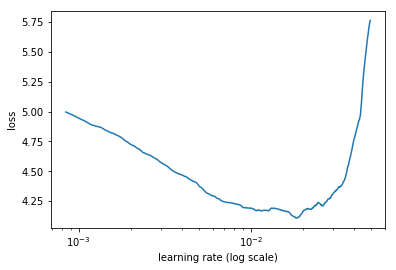

In [108]:
learner.sched.plot()

In [99]:
learner.fit(lrs, 1, wds=wd, use_clr=(20,5), cycle_len=5)

epoch      trn_loss   val_loss   accuracy   
    0      3.806221   3.930713   0.331292  
 16%|█▋        | 97/595 [00:48<04:11,  1.98it/s, loss=3.62]

    1      3.419546   3.84743    0.34378   
 33%|███▎      | 194/595 [01:38<03:22,  1.98it/s, loss=3.21]

    2      3.154111   3.79273    0.349253  
 42%|████▏     | 250/595 [02:05<02:53,  1.99it/s, loss=2.86]

    3      2.916837   3.760001   0.353512  
 47%|████▋     | 282/595 [02:21<02:36,  1.99it/s, loss=2.66]

    4      2.779528   3.754481   0.356239  


[array([3.75448]), 0.3562389444082211]

In [0]:
learner.save('lm5')

In [0]:
learner.save_encoder('lm5_enc')

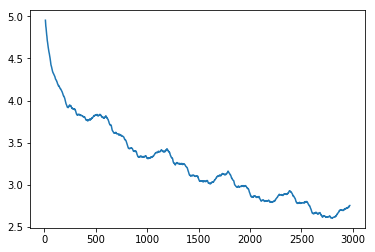

In [102]:
learner.sched.plot_loss()